In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme(style="ticks")

In [10]:
GTC_DATA_DIR = "/gws/nopw/j04/ai4er/users/pn341/earthquake-predictability/data/gtc_quakes_data"
LABQUAKES_DATA_DIR = f"{GTC_DATA_DIR}/labquakes"
MELEVEEDU_DATA_DIR = f"{LABQUAKES_DATA_DIR}/MeleVeeduetal2020"

In [11]:
i417_FILE_PATH = f"{MELEVEEDU_DATA_DIR}/i417/i417.txt"
with open(i417_FILE_PATH, "r") as file:
    lines = [next(file) for _ in range(10)]
print("".join(lines))

# RecNum  lp_disp    LT              Tau       SigN          dcdtOB    Time      recN      timedcdt       		 ec_disp   mu        etrain slipVelocity
# .       mic        mic             MPa       MPa           mic       sec       .         sec            		 .         .         .	micrometer/sec
0         -0         3805.51         0         1e-07         0         0         0         39999.9          	         0         0         0	0.000000
1         -0         3805.51         0         1e-07         0         1         1         39999.9         		 0         0         0	0.000000
2         -0         3805.51         0         1e-07         0         2         2         39999.9         		 0         0         0	0.000000
3         -0         3805.51         0         1e-07         0         3         3         39999.9         		 0         0         0	0.000000
4         -0         3805.5         0         1e-07         0         4         4         39999.9          		 0         0         0	0

In [12]:
with open(i417_FILE_PATH, "r") as file:
    df = pd.read_csv(file, delim_whitespace=True, skiprows=1)

df.columns = [
    "id",
    "lp_disp",
    "lt",
    "tau",
    "sigN",
    "dcdtOB",
    "time",
    "recN",
    "timedcdt",
    "ec_disp",
    "mu",
    "etrain",
    "slip_velocity",
    "_",
]

df = df.drop(["id", "_"], axis=1)

In [13]:
df

,lp_disp,lt,tau,sigN,dcdtOB,time,recN,timedcdt,ec_disp,mu,etrain,slip_velocity
0,-0.0,3805.51,0.000000,1.000000e-07,0.0,0.0,0,39999.9,0.0,0.0,0.0,0.000000
1,-0.0,3805.51,0.000000,1.000000e-07,0.0,1.0,1,39999.9,0.0,0.0,0.0,0.000000
2,-0.0,3805.51,0.000000,1.000000e-07,0.0,2.0,2,39999.9,0.0,0.0,0.0,0.000000
3,-0.0,3805.51,0.000000,1.000000e-07,0.0,3.0,3,39999.9,0.0,0.0,0.0,0.000000
4,-0.0,3805.50,0.000000,1.000000e-07,0.0,4.0,4,39999.9,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
418453,32553.9,1811.57,-0.011339,-2.897950e-02,21918.0,5281.9,418453,4080.8,32554900.0,0.0,17970.5,0.004103
418454,32553.9,1811.57,-0.011572,-2.851150e-02,21918.0,5282.9,418454,4081.8,32554900.0,0.0,17970.5,0.003847
418455,32553.9,1811.57,-0.011948,-2.863870e-02,21918.0,5283.9,418455,4082.8,32554900.0,0.0,17970.5,0.003479
418456,32553.9,1811.57,-0.011957,-2.844750e-02,21918.0,5284.9,418456,4083.8,32554900.0,0.0,17970.5,0.002966


In [14]:
subset_df = df[(df["time"] >= 4000) & (df["time"] <= 4250)].copy()

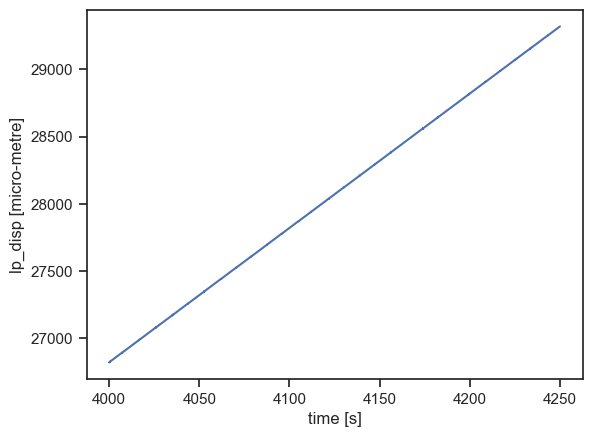

In [15]:
plt.figure()
sns.lineplot(data=subset_df, x="time", y="lp_disp")
plt.xlabel("time [s]")
plt.ylabel("lp_disp [micro-metre]")
plt.show();

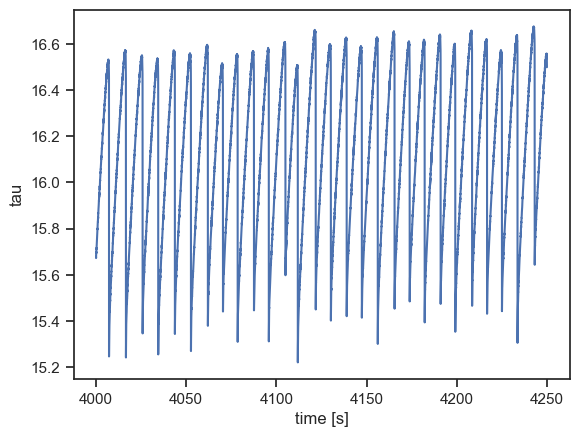

In [16]:
plt.figure()
sns.lineplot(data=subset_df, x="time", y="tau")
plt.xlabel("time [s]")
plt.ylabel("tau")
plt.show();